Probabilistic Supervised Learning - Naive Bayes(Multinomial): Create a dataset from the sample given to you(e.g. “Iris”, “Advertising” etc.). Perform the necessary pre-processing steps such as encoding. Train the model using Naive Bayes Classifier for Multinomial predictions. Give new test data and predict the classification output. Handcode the classification probability and compare with the model output. Print the confusion matrix, accuracy, precision, recall, sensitivity, specificity, MCC etc.  Analyze and write the inference. 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("../datasets/titanic.csv")

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
df.drop(columns=['Name','Fare','Siblings/Spouses Aboard','Parents/Children Aboard'],inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [8]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [9]:
df

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
...,...,...,...,...
882,0,2,0,27.0
883,1,1,1,19.0
884,0,3,1,7.0
885,1,1,0,26.0


In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
model = GaussianNB()

In [13]:
x = df.drop(columns=['Pclass'])

In [14]:
y = df['Pclass']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=True,test_size=0.2)

In [17]:
model.fit(x_train,y_train)

GaussianNB()

In [18]:
y_pred = model.predict(x_test)

In [19]:
from sklearn import metrics


In [20]:
accuracy = metrics.accuracy_score(y_test,y_pred)

In [21]:
accuracy

0.601123595505618

In [22]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [23]:
cm

array([[20,  0, 20],
       [20,  0, 18],
       [11,  2, 87]])

<Axes: >

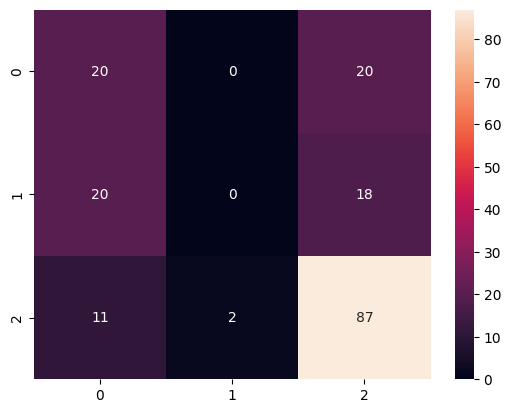

In [24]:
sb.heatmap(cm,annot=True,fmt='g')

In [28]:
f1 = metrics.f1_score(y_test,y_pred,average='micro')
# precision = metrics.precision_score(y_test,y_pred)


In [29]:
f1


0.601123595505618